In [118]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from common.util import *

In [119]:
""" seed """
seeds = [1, 2, 3, 4, 5]

""" participant """
names = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J"]

""" policy """
name_policy = "greedy"

""" condition """
conds = ["1on1", "2on1", "2on1", "3on1", "3on1"] 

""" speed """
speed = "slow"

""" reward """
rewards = ["indiv", "indiv", "share", "indiv", "share"]


In [135]:
all_outcomes = []
all_durations = []
for name in names:

    part_outcomes = []
    part_durations = []
    for num in range(len(conds)):
        
        cond = conds[num]
        reward_p = rewards[num]

        outcome = 50
        durations = []

        """ seed """
        for seed in seeds:

            if cond == "1on1":
                rep = np.load("joint_play_results/results_1on1_" + name + "_" +  speed + "_" + name_policy + "_seed_" + str(seed) + ".npz", allow_pickle=True)
            elif cond == "2on1":
                rep = np.load("joint_play_results/results_2on1_" + name + "_" + reward_p + "_" +  speed + "_" + name_policy + "_seed_" + str(seed) + ".npz", allow_pickle=True)
            elif cond == "3on1":
                rep = np.load("joint_play_results/results_3on1_" + name + "_" + reward_p + "_" +  speed + "_" + name_policy + "_seed_" + str(seed) + ".npz", allow_pickle=True)
            
            pos_list = np.array(rep["pos"]).squeeze()
            val_list = np.array(rep["q"]).squeeze()
            vrep_list = np.array(rep["rep_v"]).squeeze()
            arep_list = np.array(rep["rep_a"]).squeeze()

            epis = 10
            for epi in range(epis):

                pos_e = np.array(pos_list[epi][0])
                pos_p1 = np.array(pos_list[epi][1])

                if cond == "1on1":
                    dist1 = get_dist(pos_e[-1], pos_p1[-1])

                    if dist1 <= 0.1:
                        outcome -= 1  
                    elif pos_e[-1 ,0] < -1 or pos_e[-1 ,0] > 1 or pos_e[-1 ,1] < -1 or pos_e[-1 ,1] > 1:
                        outcome -= 1

                if cond == "2on1":

                    pos_p2 = np.array(pos_list[epi][2])
                    dist1 = get_dist(pos_e[-1], pos_p1[-1])
                    dist2 = get_dist(pos_e[-1], pos_p2[-1])

                    if dist1 <= 0.1 or dist2 <= 0.1:
                        outcome -= 1
                    elif pos_e[-1 ,0] < -1 or pos_e[-1 ,0] > 1 or pos_e[-1 ,1] < -1 or pos_e[-1 ,1] > 1:
                        outcome -= 1

                if cond == "3on1":

                    pos_p2 = np.array(pos_list[epi][2])
                    pos_p3 = np.array(pos_list[epi][3])
                    dist1 = get_dist(pos_e[-1], pos_p1[-1])
                    dist2 = get_dist(pos_e[-1], pos_p2[-1])
                    dist3 = get_dist(pos_e[-1], pos_p3[-1])

                    if dist1 <= 0.1 or dist2 <= 0.1 or dist3 <= 0.1:
                        outcome -= 1
                    elif pos_e[-1 ,0] < -1 or pos_e[-1 ,0] > 1 or pos_e[-1 ,1] < -1 or pos_e[-1 ,1] > 1:
                        outcome -= 1             

            duration = len(np.array(pos_list[epi][0]))
            durations.append(duration)

        part_outcomes.append((50 - outcome)/50)
        part_durations.append(np.array(durations).mean()/10)

    all_outcomes.append(part_outcomes)
    all_durations.append(part_durations)

mean outcomes [0.132 0.594 0.806 0.926 0.984]
s.e.m outcomes [0.01678094 0.04552362 0.05177258 0.01698234 0.00473286]
mean theory [0.132     0.24376   0.3390048]
s.e.m theory [0.01678094 0.02729825 0.03347327]


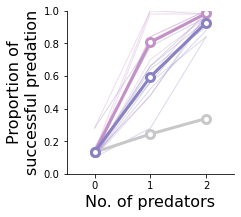

In [136]:
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(111)

purple = [137/255, 129/255, 194/255]
pink = [196/255, 144/255, 199/255]
gray = [200/255, 200/255, 200/255]

marker_purple = {
    "markersize": 8,
    "markeredgewidth": 3.0,
    "markeredgecolor": purple,
    "markerfacecolor": "white",
    "color": purple,
    "linewidth": 3,
    "alpha": 1
}

marker_pink = {
    "markersize": 8,
    "markeredgewidth": 3.0,
    "markeredgecolor": pink,
    "markerfacecolor": "white",
    "color": pink,
    "linewidth": 3,
    "alpha": 1
}

marker_gray = {
    "markersize": 8,
    "markeredgewidth": 3.0,
    "markeredgecolor": gray,
    "markerfacecolor": "white",
    "color": gray,
    "linewidth": 3,
    "alpha": 1
}

all_theories = []
for par in range(len(names)):
    outcome = all_outcomes[par][0]
    theory= np.array([outcome, 1-(1-outcome)**2, 1-(1-outcome)**3])
    all_theories.append(theory)

mean_o = np.array(all_outcomes).mean(0)
se_o = np.array(all_outcomes).std(0)/np.sqrt(10)
mean_t = np.array(all_theories).mean(0)
se_t = np.array(all_theories).std(0)/np.sqrt(10)

print("mean outcomes", mean_o)
print("s.e.m outcomes", se_o)

print("mean theory", mean_t)
print("s.e.m theory", se_t)


part_prop_indiv = []
part_prop_share = []
part_prop_theory = []

for par in range(len(names)):
    
    pin = [all_outcomes[par][0], all_outcomes[par][1], all_outcomes[par][3]]
    psh = [all_outcomes[par][0], all_outcomes[par][2], all_outcomes[par][4]]

    xs = range(3)
    plt.plot(xs, pin, c=purple, linewidth = 1, alpha=0.3)
    plt.plot(xs, psh, c=pink, linewidth = 1, alpha=0.3)

    part_prop_indiv.append(pin)
    part_prop_share.append(psh)
    part_prop_theory.append(pth)

mean_prop_indiv = [mean_o[0], mean_o[1], mean_o[3]]
mean_prop_share = [mean_o[0], mean_o[2], mean_o[4]]

plt.plot(xs, mean_t, 'o-', **marker_gray)
plt.plot(xs, mean_prop_share, 'o-', **marker_pink)
plt.plot(xs, mean_prop_indiv, 'o-', **marker_purple)

ax.set_xlim(-0.5, 2.5)
ax.set_ylim(0, 1)
ax.set_xlabel("No. of predators", fontsize=16)
ax.set_ylabel("Proportion of\nsuccessful predation", fontsize=16)
[ax.spines[side].set_visible(False) for side in ['right', 'top']];


mean durations [14.422 12.926  7.432  3.944  4.834]
s.e.m durations [1.5316147  1.31682664 1.22291848 0.81086522 0.55952158]


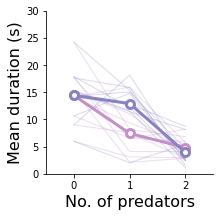

In [138]:
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(111)

mean_d = np.array(all_durations).mean(0)
se_d = np.array(all_durations).std(0)/np.sqrt(10)

print("mean durations", mean_d)
print("s.e.m durations", se_d)

for par in range(len(names)):
    
    pin = [all_durations[par][0], all_durations[par][1], all_durations[par][3]]
    psh = [all_durations[par][0], all_durations[par][2], all_durations[par][4]]

    xs = range(3)
    plt.plot(xs, pin, c=purple, linewidth = 1, alpha=0.3)
    plt.plot(xs, psh, c=pink, linewidth = 1, alpha=0.3)

mean_duration_indiv = [mean_d[0], mean_d[1], mean_d[3]]
mean_duration_share = [mean_d[0], mean_d[2], mean_d[4]]

plt.plot(xs, mean_duration_share, 'o-', **marker_pink)
plt.plot(xs, mean_duration_indiv, 'o-', **marker_purple)

ax.set_xlim(-0.5, 2.5)
ax.set_ylim(0, 30)
ax.set_xlabel("No. of predators", fontsize=16)
ax.set_ylabel("Mean duration (s)", fontsize=16)
[ax.spines[side].set_visible(False) for side in ['right', 'top']];
